<a href="https://colab.research.google.com/github/SUPAGORN0306/229352-StatisticalLearning/blob/main/Lab06_670510771_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #6

## Support Vector Machines (SVM)

[SVM module documentation](https://scikit-learn.org/stable/modules/svm.html#svm)

[LinearSVC documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC)

[SVC documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC  # fast but only linear
from sklearn.svm import SVC  # slower but can do kernels

In [2]:
# Load the iris data
iris = datasets.load_iris()
X = iris.data[:, 2:]
y = iris.target

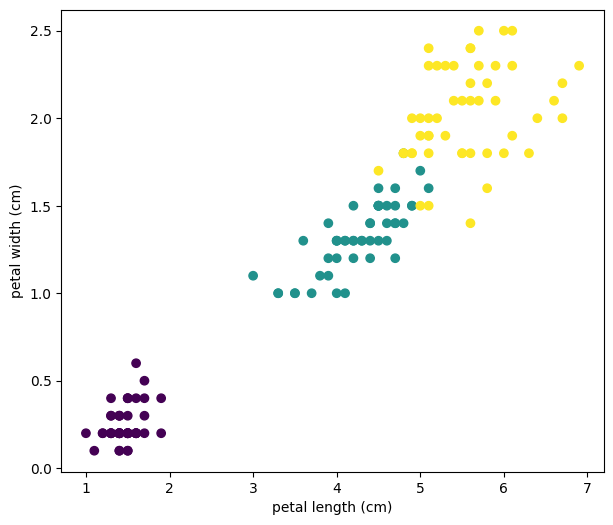

In [3]:
# Plot the data
plt.figure(figsize=(7,6))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.show()

#### In this problem, you'll use support vector machines to classify the Iris data

#### The following function helps you plot the decision boundary.

In [4]:
# Plot the decision boundaries
def plot_decision_boundary(clf, X, y):
    h = 0.005  # Boundary lines' resolution
    x_min, x_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
    y_min, y_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(7,6))
    plt.contourf(xx, yy, Z, alpha=0.25)  # Background
    plt.contour(xx, yy, Z, colors='k', linewidths=0.2)  # Boundary lines
    plt.scatter(X[:,0], X[:,1], c=y);  # Data points
    plt.xlabel(iris.feature_names[2])
    plt.ylabel(iris.feature_names[3])

#### Exercise 1. Split the data into training set and test set.

In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

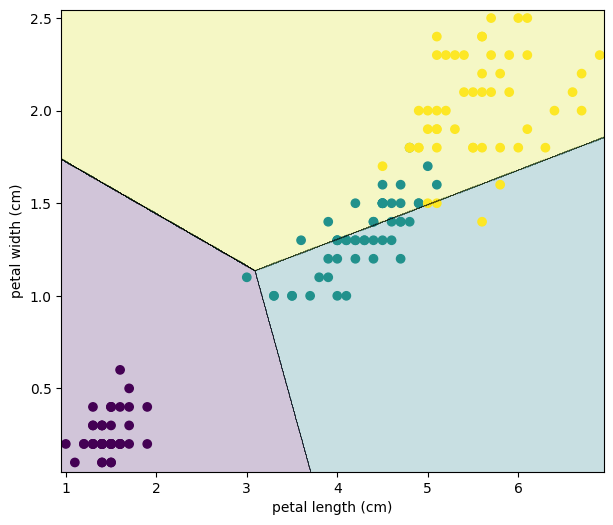

In [8]:
linsvm =LinearSVC(C=0.1)
linsvm.fit(x_train, y_train)
plot_decision_boundary(linsvm, X, y)

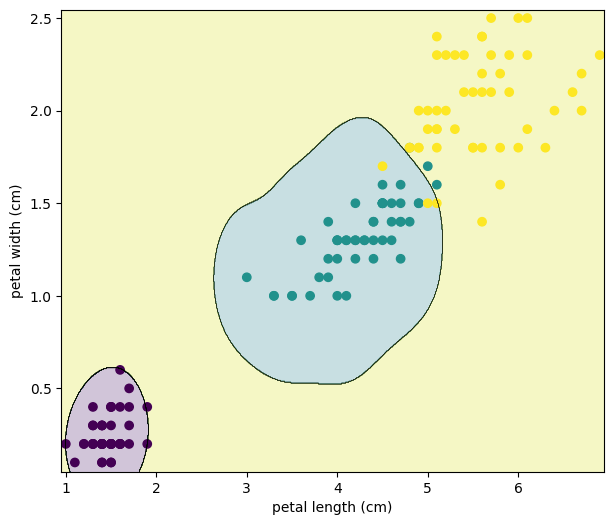

In [12]:
svm = SVC(C=0.1, kernel='rbf', gamma=10)
svm.fit(x_train, y_train)
plot_decision_boundary(svm, X, y)

#### Exercise 2. Learn a linear SVM classifier using sklearn.svm.LinearSVC. You will need to set `loss='hinge'`.

#### Try different values of the tradeoff parameter: `C = 0.01, 0.1, 1.0, 10.0, 100.0` and use `plot_decision_boundary` to plot the decision boundary.

#### If you encounter `RuntimeError`, consider setting `max_iter=100000`

#### What is the effect of `C` on the decision boundary?

/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


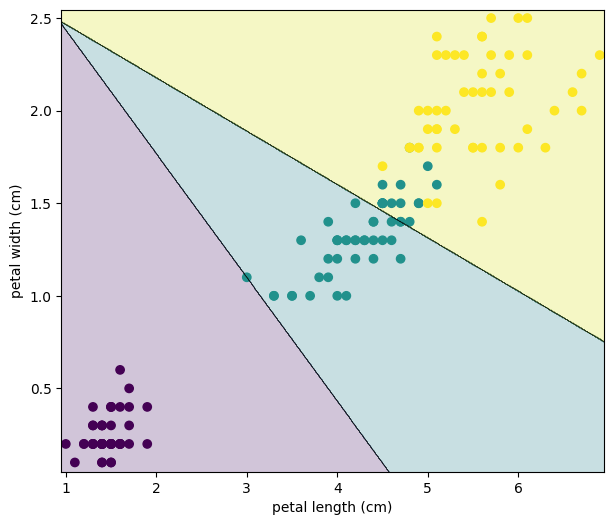

In [57]:
# Linear SVM
linsvm = LinearSVC(C=10, loss='hinge', random_state=42)
linsvm.fit(x_train, y_train)
plot_decision_boundary(linsvm, X, y)

#### Exercise 3. Pick a value of `C` that you like. Then report the test error.

In [58]:
from sklearn.metrics import accuracy_score

y_pred_lin = linsvm.predict(x_test)
acc_lin = accuracy_score(y_test, y_pred_lin)
print(f"--- Linear SVM (C=10) ---")
print(f"Test Accuracy: {acc_lin:.4f}")
print(f"Test Error: {1 - acc_lin:.4f}\n")

--- Linear SVM (C=10) ---
Test Accuracy: 0.9778
Test Error: 0.0222



#### Exercise 4. Now try kernel SVM with a quadratic kernel. You can do this with sklearn.svm.SVC, setting `kernel='rbf'` and `C = 1.0`.

#### Try different values of the tradeoff parameter: `gamma = 0.01, 0.1, 1.0, 10.0, 100.0` and use `plot_decision_boundary` to plot the decision boundary.

#### If you encounter `RuntimeError`, consider setting `max_iter=100000`

#### What is the effect of `gamma` on the decision boundary?

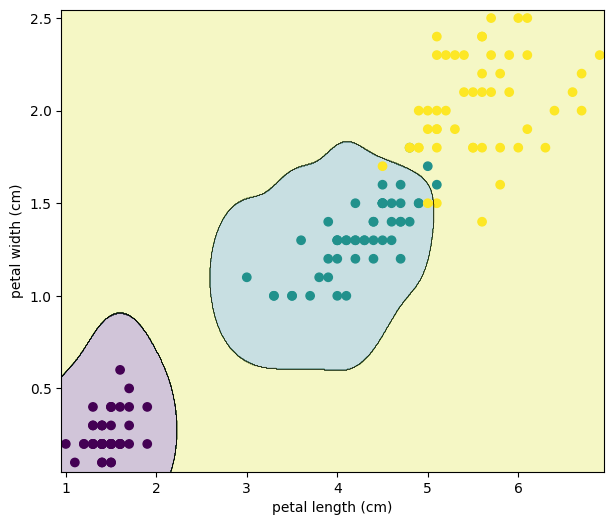

In [59]:
# Kernel SVM
svm_rbf = SVC(C=1.0, kernel='rbf', gamma=10)
svm_rbf.fit(x_train, y_train)
plot_decision_boundary(svm, X, y)

#### Exercise 5. Pick a value of `gamma` that you like. Then report the test error and the number of support vectors.

In [60]:
y_pred_rbf = svm_rbf.predict(x_test)
acc_rbf = accuracy_score(y_test, y_pred_rbf)
print(f"--- Kernel SVM (gamma=10) ---")
print(f"Test Accuracy: {acc_rbf:.4f}")
print(f"Test Error: {1 - acc_rbf:.4f}")
print(f"Support Vectors: {svm_rbf.n_support_.sum()} {svm_rbf.n_support_}")

--- Kernel SVM (gamma=10) ---
Test Accuracy: 0.9778
Test Error: 0.0222
Support Vectors: 47 [ 7 17 23]


#### Exercise 6. Between Linear SVM and Kernel SVM, which model would you prefer to use for classification of Iris data?
1. Explain using test accuracy
2. Explaing using decision boundary plot

In [61]:
from sklearn.metrics import accuracy_score

y_pred_lin = linsvm.predict(x_test)
acc_lin = accuracy_score(y_test, y_pred_lin)
print(f"--- Linear SVM (C=10) ---")
print(f"Test Accuracy: {acc_lin:.4f}")


y_pred_rbf = svm_rbf.predict(x_test)
acc_rbf = accuracy_score(y_test, y_pred_rbf)
print(f"--- Kernel SVM (gamma=10) ---")
print(f"Test Accuracy: {acc_rbf:.4f}")

--- Linear SVM (C=10) ---
Test Accuracy: 0.9778
--- Kernel SVM (gamma=10) ---
Test Accuracy: 0.9778


1. เมื่อเลือก Linear SVM ที่กำหนดค่า C =10 และ Kernel SVM ที่ gamma = 10 จะให้ค่า accuracy ควรใช้ Linear SVM เพราะโครงสร้างโมเดลไม่ซับซ้อน
2. *   Linear SVM : เส้นแบ่งเขตเป็น เส้นตรงมีความกว้าง ที่ครอบคลุมพื้นที่ของข้อมูลแต่ละกลุ่มได้ดี ซึ่งลดความเสี่ยงในการทำนายผิดพลาดเมื่อเจอข้อมูลใหม่ที่มีความผันผวน
    *   Kernel SVM : เส้นแบ่งเขตเก็บข้อมูลได้ดีมากเกินอาจเกิด Overfitting



